# SymPy for Calculus

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]

In [90]:
from operator import methodcaller
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm
import sympy.vector as smv
import scipy.integrate as sci

## Symbolics basics

In [3]:
x, y = sm.symbols("x y")
x

x

In [4]:
a = sm.symbols("a:10")
a

(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9)

In [5]:
b = sm.symbols("b:10", integer=True)
b

(b0, b1, b2, b3, b4, b5, b6, b7, b8, b9)

In [6]:
z = sm.Symbol("z", real=True)

In [7]:
f, g = sm.symbols("f g", cls=sm.Function)
f

f

In [8]:
F = sm.Function("F")
F

F

In [9]:
F = sm.Function("F")(x)
F

F(x)

In [10]:
sm.sin(x)

sin(x)

In [11]:
sm.log(x)

log(x)

In [12]:
sm.log(x, 3)

log(x)/log(3)

In [13]:
x**(3/2)

x**1.5

In [14]:
x**sm.Rational(3, 2)

x**(3/2)

In [15]:
# dir(sm)

## Limits

In [16]:
f = (sm.cos(x) - 1) / x
f

(cos(x) - 1)/x

In [17]:
sm.limit(f, x, 0)

0

In [18]:
sm.limit(f, x, sm.oo)

0

In [19]:
f = 2 * sm.exp(1 / x) / (sm.exp(1 / x) + 1)

sm.limit(f, x, 0, dir="+")

2

## Derivatives

In [20]:
sm.diff(x**2, x)

2*x

In [21]:
sm.diff(x**2, x, 2, evaluate=True)

2

In [22]:
sm.diff(x**2, x, 2, evaluate=False)

Derivative(x**2, (x, 2))

In [23]:
sm.diff(sm.exp(x**2), x)

2*x*exp(x**2)

In [24]:
f = x * sm.exp(x**sm.Rational(3, 4)) / (1 + sm.sin(x / 2))
f

x*exp(x**(3/4))/(sin(x/2) + 1)

In [25]:
dfdx = sm.diff(f, x)
dfdx

3*x**(3/4)*exp(x**(3/4))/(4*(sin(x/2) + 1)) - x*exp(x**(3/4))*cos(x/2)/(2*(sin(x/2) + 1)**2) + exp(x**(3/4))/(sin(x/2) + 1)

In [26]:
f = x**2 * y + z
f

x**2*y + z

In [27]:
sm.diff(f, y)

x**2

In [28]:
f, g = sm.symbols("f g", cls=sm.Function)
g = g(x)
f = f(x + g)
f

f(x + g(x))

In [29]:
sm.diff(f, x)

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

## Antiderivatives

In [30]:
f = sm.cos(x)
sm.integrate(f, x)

sin(x)

In [31]:
f = sm.sin(sm.log(x))
sm.integrate(f, x)

x*sin(log(x))/2 - x*cos(log(x))/2

In [32]:
f = sm.exp(x**2)
sm.integrate(f, x)

sqrt(pi)*erfi(x)/2

In [33]:
f = 1 / sm.sqrt(1 + x**2)
sm.integrate(f, x)

asinh(x)

In [34]:
f = x**(-1/4)
sm.integrate(f, x)

1.33333333333333*x**0.75

In [35]:
f = x**sm.Rational(-1, 4)
sm.integrate(f, x)

4*x**(3/4)/3

In [36]:
f = 2 * (sm.sin(x**2) * sm.log(1 / x))
F = sm.integrate(f, x)

In [37]:
F.subs(x, 1)

gamma(3/4)**2*hyper((3/4, 3/4), (3/2, 7/4, 7/4), -1/4)/(8*gamma(7/4)**2)

In [38]:
F.subs(x, 1).evalf()

0.215555493685125

In [39]:
f = sm.exp(x**2) / x
F = sm.integrate(f, (x, 0, sm.pi))
F

-EulerGamma/2 + Ei(pi**2)/2

In [40]:
F.evalf()

1110.32084473226

In [41]:
t = sm.symbols("t", real=True)
f = x**10 * sm.exp(x)
F = sm.integrate(f, (x, 0, t))
F

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 3628800

In [42]:
f = 1 / x
F = sm.integrate(f, (x, 1, sm.oo))
F


oo

In [43]:
f = 1 / x**2
F = sm.integrate(f, (x, 1, sm.oo))
F

1

In [44]:
f = 1 / x**t
F = sm.integrate(f, (x, 1, sm.oo))
F


Piecewise((1/(t - 1), t > 1), (Integral(x**(-t), (x, 1, oo)), True))

## Ordinary differential equations

In [45]:
x0 = 2
f0 = 6

In [46]:
dfdx = 2 * x ** 2
dfdx

2*x**2

In [47]:
fx = sm.integrate(dfdx, x)
fx

2*x**3/3

In [48]:
C = f0 - fx.subs(x, x0)
C

2/3

In [49]:
fx = fx + C
fx

2*x**3/3 + 2/3

In [50]:
sm.diff(fx, x) == dfdx

True

In [51]:
fx.subs(x, x0) == f0

True

## Series

In [52]:
n = sm.symbols("n", integer=True)

In [53]:
f = 1 / 2**n
S = sm.Sum(f, (n, 0, sm.oo))
S

Sum(2**(-n), (n, 0, oo))

In [54]:
S.doit()

2

In [55]:
f = sm.atan(n) / (n**sm.Rational(11, 10))
S = sm.Sum(f, (n, 1, sm.oo))
S

Sum(atan(n)/n**(11/10), (n, 1, oo))

In [56]:
S.doit()

Sum(atan(n)/n**(11/10), (n, 1, oo))

In [57]:
S.n()

15.3028821020457

In [58]:
f = (1 + sm.cos(n)) / n
S = sm.Sum(f, (n, 1, sm.oo))
S

Sum((cos(n) + 1)/n, (n, 1, oo))

In [59]:
S.doit()

Sum((cos(n) + 1)/n, (n, 1, oo))

In [60]:
S.n()

0.e+2

## Vectors

In [61]:
x, y, z, t = sm.symbols("x, y, z, t")
us = sm.symbols("u:3")
vs = sm.symbols("v:3")

In [62]:
u = sm.Matrix(us)
v = sm.Matrix(vs)
u.T, v.T

(Matrix([[u0, u1, u2]]), Matrix([[v0, v1, v2]]))

In [63]:
2*u + v

Matrix([
[2*u0 + v0],
[2*u1 + v1],
[2*u2 + v2]])

In [64]:
u.T @ v

Matrix([[u0*v0 + u1*v1 + u2*v2]])

In [65]:
u.dot(v)

u0*v0 + u1*v1 + u2*v2

In [66]:
u.cross(v)

Matrix([
[ u1*v2 - u2*v1],
[-u0*v2 + u2*v0],
[ u0*v1 - u1*v0]])

In [67]:
u.norm()

sqrt(Abs(u0)**2 + Abs(u1)**2 + Abs(u2)**2)

In [68]:
unit_v = v / v.norm()**2
proj_u_v = u.dot(v) * unit_v
proj_u_v.T

Matrix([[v0*(u0*v0 + u1*v1 + u2*v2)/(Abs(v0)**2 + Abs(v1)**2 + Abs(v2)**2), v1*(u0*v0 + u1*v1 + u2*v2)/(Abs(v0)**2 + Abs(v1)**2 + Abs(v2)**2), v2*(u0*v0 + u1*v1 + u2*v2)/(Abs(v0)**2 + Abs(v1)**2 + Abs(v2)**2)]])

In [69]:
r0 = sm.Matrix([1, 2, 3])
m = sm.Matrix([1, -1, 2])
r = r0 + t * m
r

Matrix([
[  t + 1],
[  2 - t],
[2*t + 3]])

In [70]:
n = sm.Matrix([1, 1, 1])
r = sm.Matrix([x, y, z])
p = n.dot(r - r0)
p

x + y + z - 6

In [97]:
r = sm.Matrix([
    sm.sin(t),
    sm.cos(t),
    t
])
v = sm.diff(r, t)
a = sm.diff(v, t)

theta = sm.acos(v.dot(a) / (v.norm() * a.norm()))
theta

pi/2

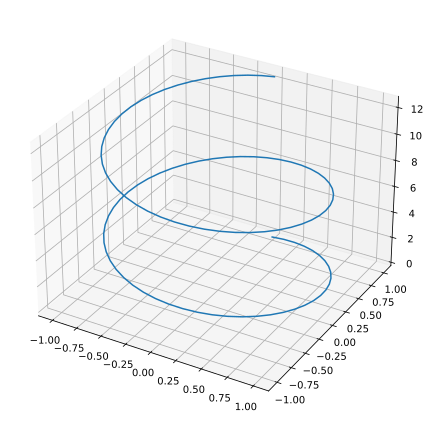

In [98]:
t_num = np.linspace(0, 4*np.pi, 100)
r_num = sm.lambdify([t], r, modules="numpy")
x_num, y_num, z_num = map(methodcaller("ravel"), r_num(t_num))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")
ax.plot(x_num, y_num, z_num)
fig.tight_layout()

In [105]:
r_integ = sm.Integral(v).doit()
r_integ

Matrix([
[sin(t)],
[cos(t)],
[     t]])

In [106]:
r_integ == r

True

In [109]:
r_integ = sm.integrate(v, t)
r_integ

Matrix([
[sin(t)],
[cos(t)],
[     t]])

In [112]:
r_integ = sm.integrate(v, (t, 0, 4*sm.pi))
r_integ.norm()

4*pi

In [123]:
v_num = sm.lambdify([t], v, modules="numpy")
r_integ = sci.quad_vec(v_num, 0, 4*np.pi)[0]
np.linalg.norm(r_integ)

12.566370614359176

In [133]:
norm_dr = sm.diff(r, t).norm()
norm_dr

sqrt(Abs(sin(t))**2 + Abs(cos(t))**2 + 1)

In [140]:
arc_length = sm.integrate(norm_dr, (t, 0, 4*sm.pi))
arc_length

4*sqrt(2)*pi

In [141]:
norm_dr_num = sm.lambdify([t], norm_dr, modules="numpy")
arc_length_num = sci.quad(norm_dr_num, 0, 4*np.pi)[0]
arc_length_num / arc_length.evalf()

1.00000000000000

In [143]:
f = x**2 * sm.sin(x + y)
dfdxy = sm.diff(f, x, y)
dfdxy

x*(-x*sin(x + y) + 2*cos(x + y))

In [144]:
dfdyx = sm.diff(f, y, x)
dfdyx

x*(-x*sin(x + y) + 2*cos(x + y))

In [145]:
dfdyx == dfdxy

True